### 감성분석

In [2]:
# import library
import torch
from transformers import AutoTokenizer, AutoModelForSequenceClassification, TextClassificationPipeline

# load model
tokenizer = AutoTokenizer.from_pretrained("jaehyeong/koelectra-base-v3-generalized-sentiment-analysis")
model = AutoModelForSequenceClassification.from_pretrained("jaehyeong/koelectra-base-v3-generalized-sentiment-analysis")
sentiment_classifier = TextClassificationPipeline(tokenizer=tokenizer, model=model)

c:\Users\NT550-048\anaconda3\envs\doeat\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
No CUDA runtime is found, using CUDA_HOME='C:\Program Files\NVIDIA GPU Computing Toolkit\CUDA\v11.8'
WARNING[XFORMERS]: xFormers can't load C++/CUDA extensions. xFormers was built for:
    PyTorch 2.0.1+cu118 with CUDA 1108 (you have 2.0.1+cpu)
    Python  3.9.13 (you have 3.9.17)
  Please reinstall xformers (see https://github.com/facebookresearch/xformers#installing-xformers)
  Memory-efficient attention, SwiGLU, sparse and more won't be available.
  Set XFORMERS_MORE_DETAILS=1 for more details


### 컬리 데이터

In [101]:
review_list = list(kurly_data['ReviewText'])

In [102]:
# 감정분석 결과 및 점수
pred_label = []
pred_score = []
for rev in review_list:
    label_temp = sentiment_classifier(rev)[0]['label']
    score_temp = sentiment_classifier(rev)[0]['score']
    pred_label.append(label_temp)
    pred_score.append(score_temp)

In [103]:
kurly_data['sentiment_label'] = pred_label
kurly_data['sentiment_score'] = pred_score

In [104]:
kurly_data.head(2)

,ProductCode,MemberGrade,MemberName,ProductName,ReviewText,ReviewDate,ReviewLike,sentiment_label,sentiment_score
0,5136210,일반,박**,[바로생활] 아카시아꿀 스틱 10포,"작은 박스로 2개 (10개씩 들어있어 20개 네요 ) 주문 했습니다. 의심이 많은 타입이라 뭐든 한번에 주문한적이 없고 ,, 꼭 먹어보고 써보고 나서야 안심하는 타입입니다 ㅋ 요즘은..아카시아가 많이 없어 .. 아카시아 향 맏아보기도 정말 힘든데.. 아카시아 꿀이라니 ^^ 너무 반갑고 예뻐 주문해 봤습니다. 일단 너무 작고 예쁘네요 . 더운 여름에 밖에서 운동하는 딸을 위해 건강한 간식으로 챙겨 주려고 합니다. 예쁜 포장이라 예민한 아이 마음에도 쏙 드는 듯 합니다. 배송도 빠르고 좋은제품 좋은 가격에 잘 산걸 같아 기분 좋네요.^^",2023.06.23,0,1,0.994090
1,5136210,프렌즈,강**,[바로생활] 아카시아꿀 스틱 10포,물에 타먹으니까 되게 다네요,2023.08.15,0,1,0.971502


In [105]:
kurly_data['sentiment_label'].value_counts()

sentiment_label
1    10074
0      580
Name: count, dtype: int64

### 워커비 데이터

In [ ]:
review_list = list(workerbee_data['contents'])

In [ ]:
# 감정분석 결과 및 점수
pred_label = []
pred_score = []
for rev in review_list:
    label_temp = sentiment_classifier(rev)[0]['label']
    score_temp = sentiment_classifier(rev)[0]['score']
    pred_label.append(label_temp)
    pred_score.append(score_temp)

In [ ]:
workerbee_data['sentiment_label'] = pred_label
workerbee_data['sentiment_score'] = pred_score

In [106]:
workerbee_data.head(2)

,itemNo,itemName,lastSalePrice,heartCount,reviewCount,itemReviewNo,optionValue,userId,point,contents,isGift,insertTimestamp,token_nouns_bareun,token_verbs_bareun,sentiment_label,sentiment_score
0,1308881,[꿀카라멜] 워커비 허니 얼그레이 카라멜 50g,3000,7126,796,6390415,['[구매단위]박스구매(12개입)'],hai***,5,"°고마운 일이 생겨, 지인분께 선물로도 드리고~ 나도 먹고! 재주문 했어요~, 포장이 너무 귀엽! 얼그레이 향이 진하게 코 끝에!",F,2023-08-11 05:42:48,"[일, 지인, 분, 선물, 나, 재, 주문, 포장, 귀엽, 얼그레이, 향, 코, 끝]","[고맙, 생기, 드리, 먹, 하, 진하]",1,0.994407
1,1308881,[꿀카라멜] 워커비 허니 얼그레이 카라멜 50g,3000,7126,796,6376671,['[구매단위]낱개구매'],yangsfami***,5,얼그레이향이 은은하게 나서 정말 맛있어요 당 떨어질 때 하나씩 집어먹기 딱 좋은 것 같아요,F,2023-08-09 16:58:54,"[얼그레이향, 당, 때, 하나, 씩, 것]","[은은하, 나, 맛있, 떨어지, 집어먹, 좋, 같]",1,0.992849


In [108]:
workerbee_data['sentiment_label'].value_counts()

sentiment_label
1    4965
0     145
Name: count, dtype: int64

### 카카오톡 선물하기 데이터

In [ ]:
review_list = list(kakao_data['review_text'])

In [ ]:
# 감정분석 결과 및 점수
pred_label = []
pred_score = []
for rev in review_list:
    label_temp = sentiment_classifier(rev)[0]['label']
    score_temp = sentiment_classifier(rev)[0]['score']
    pred_label.append(label_temp)
    pred_score.append(score_temp)

In [ ]:
kakao_data['sentiment_label'] = pred_label
kakao_data['sentiment_score'] = pred_score

In [111]:
kakao_data.head(2)

,id,name,brand,sellingPrice,wishCount,reviewCount,product_tag2,review_text,rating,review_tag1,review_tag2,review_time,token_nouns_bareun,token_verbs_bareun,sentiment_label,sentiment_score
0,2270784,국산 프로폴리스 혼합 천연벌꿀 허니스틱(15스틱) 답례품 비마스터 -23.5,비마스터,27800,2228,1152,[],숙취후 아침에 따뜻한 물에 한포 간편히 타먹을수 있어서 좋드라구요. 스틱형이라 휴대도간편하고 물에도 잘녹아요. 주머니나 가방안에 휴대하기도간편해서 허기졌을때 간편하게 당충전하기에도 너무좋습니다. 국내산꿀이라 믿을수있고 맛도좋아요. 배송엄청빠르네요,4,응원,직장동료,2023-04-10 14:16:48,"[숙취, 후, 아침, 물, 포, 수, 스틱, 형, 휴대, 물, 주머니, 가방, 안, 휴대, 때, 당, 충전, 국내, 산꿀, 수, 맛, 배송]","[따뜻하, 타, 먹, 있, 좋, 이, 간편하, 녹, 하, 간편하, 허기지, 간편하, 하, 좋, 이, 믿, 있, 좋, 빠르]",1,0.990664
1,2270784,국산 프로폴리스 혼합 천연벌꿀 허니스틱(15스틱) 답례품 비마스터 -23.5,비마스터,27800,2228,1152,[],친구가 건강관리 하라고 선물해 주었습니다 !! 후기가 좋아서 기대했는데 맛있고 건강해지는 기분 입니당🥳,4,생일,친구,2023-04-09 03:27:02,"[친구, 건강관리, 선물, 후기, 기대, 건강, 기분]","[하, 하, 주, 좋, 하, 맛있, 하, 지, 이]",1,0.995086


In [110]:
kakao_data['sentiment_label'].value_counts()

sentiment_label
1    1881
0      41
Name: count, dtype: int64

## 빈도분석

In [4]:
import torch
import pandas as pd
import numpy as np
import csv
from hanspell import spell_checker
from collections import Counter
# 한국어 형태소 분석
from konlpy.tag import Okt, Hannanum, Kkma, Mecab, Komoran
# 워드클라우드
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from PIL import Image
from collections import Counter

In [72]:
def kw_in_product(product_name, keyword):
    return kurly_data[(kurly_data['ProductName'] == product_name)&(kurly_data['ReviewText'].apply(lambda x:keyword in x))]['ReviewText']

In [63]:
# 리뷰 출력시 ... 없이 전부 나오게 설정
pd.set_option('display.max_colwidth', None)
#pd.set_option('display.max_columns', None)
#pd.set_option('display.width', None)
pd.set_option('display.max_rows', None)

In [5]:
kurly_data = pd.read_csv(r"C:\Users\NT550-048\Desktop\doeat\doeat2023\KYJ\honey_stick\data\kurly_data_preprocessed.csv", index_col=0)

In [100]:
kurly_data.head(2)

,ProductCode,MemberGrade,MemberName,ProductName,ReviewText,ReviewDate,ReviewLike
0,5136210,일반,박**,[바로생활] 아카시아꿀 스틱 10포,"작은 박스로 2개 (10개씩 들어있어 20개 네요 ) 주문 했습니다. 의심이 많은 타입이라 뭐든 한번에 주문한적이 없고 ,, 꼭 먹어보고 써보고 나서야 안심하는 타입입니다 ㅋ 요즘은..아카시아가 많이 없어 .. 아카시아 향 맏아보기도 정말 힘든데.. 아카시아 꿀이라니 ^^ 너무 반갑고 예뻐 주문해 봤습니다. 일단 너무 작고 예쁘네요 . 더운 여름에 밖에서 운동하는 딸을 위해 건강한 간식으로 챙겨 주려고 합니다. 예쁜 포장이라 예민한 아이 마음에도 쏙 드는 듯 합니다. 배송도 빠르고 좋은제품 좋은 가격에 잘 산걸 같아 기분 좋네요.^^",2023.06.23,0
1,5136210,프렌즈,강**,[바로생활] 아카시아꿀 스틱 10포,물에 타먹으니까 되게 다네요,2023.08.15,0


### 감성분석

In [133]:
# 리뷰 출력시 ... 없이 전부 나오게 설정
pd.set_option('display.max_colwidth', None)
#pd.set_option('display.max_columns', None)
#pd.set_option('display.width', None)
pd.set_option('display.max_rows', 20)

In [34]:
kurly_data['ReviewText'][0]

'작은 박스로 2개 (10개씩 들어있어 20개네요 ) 주문했습니다.  의심이 많은 타입이라 뭐든 한 번에 주문한 적이 없고 ,,  꼭 먹어보고 써보고 나서야 안심하는 타입입니다 ㅋ    요즘은.. 아카시아가 많이 없어 ..  아카시아 향 맡아보기도 정말 힘든데.. 아카시아 꿀이라니  ^^  너무 반갑고 예뻐 주문해 봤습니다.   일단 너무 작고 예쁘네요.  더운 여름에 밖에서 운동하는 딸을 위해 건강한 간식으로  챙겨 주려고 합니다.   예쁜 포장이라 예민한 아이 마음에도 쏙 드는 듯합니다.   배송도 빠르고 좋은 제품 좋은 가격에 잘 산 걸 같아  기분 좋네요.^^'

### 토큰화(바른AI)

In [113]:
import sys
import google.protobuf.text_format as tf
from bareunpy import Tokenizer, Tagger

# If you have your own localhost bareun.
bareun_tokenizer = Tokenizer('koba-RCCJZSI-RI7UFUI-TIRFYWI-LXMRWDY', 'localhost')

In [128]:
kurly_data['token_nouns_bareun'] = kurly_data['ReviewText'].apply(lambda x:bareun_tokenizer.tokenize(x).nouns())

In [129]:
kurly_data['token_verbs_bareun'] = kurly_data['ReviewText'].apply(lambda x:bareun_tokenizer.tokenize(x).verbs())

In [6]:
kurly_data.head(2)

,ProductCode,MemberGrade,MemberName,ProductName,ReviewText,ReviewDate,ReviewLike,sentiment_label,sentiment_score,token_nouns_bareun,token_verbs_bareun
0,5136210,일반,박**,[바로생활] 아카시아꿀 스틱 10포,작은 박스로 2개 (10개씩 들어있어 20개 네요 ) 주문 했습니다. 의심이 많은...,2023.06.23,0,1,0.994090,"['박스', '2', '개', '10', '개', '씩', '20', '개', '네...","['작', '들', '있', '하', '많', '이', '하', '없', '먹', ..."
1,5136210,프렌즈,강**,[바로생활] 아카시아꿀 스틱 10포,물에 타먹으니까 되게 다네요,2023.08.15,0,1,0.971502,['물'],"['타', '먹', '달']"


In [8]:
len(kurly_data)

10654

In [7]:
kurly_data.drop_duplicates(['ReviewText'])

,ProductCode,MemberGrade,MemberName,ProductName,ReviewText,ReviewDate,ReviewLike,sentiment_label,sentiment_score,token_nouns_bareun,token_verbs_bareun
0,5136210,일반,박**,[바로생활] 아카시아꿀 스틱 10포,작은 박스로 2개 (10개씩 들어있어 20개 네요 ) 주문 했습니다. 의심이 많은...,2023.06.23,0,1,0.994090,"['박스', '2', '개', '10', '개', '씩', '20', '개', '네...","['작', '들', '있', '하', '많', '이', '하', '없', '먹', ..."
1,5136210,프렌즈,강**,[바로생활] 아카시아꿀 스틱 10포,물에 타먹으니까 되게 다네요,2023.08.15,0,1,0.971502,['물'],"['타', '먹', '달']"
2,5136210,일반,김**,[바로생활] 아카시아꿀 스틱 10포,그냥 간단하게 먹기 딱 좋아요 한 포에 생각보다는 조금 들어있었던거같은데 그래도 나...,2023.08.15,0,1,0.973412,"['포', '생각', '거']","['간단하', '먹', '좋', '들', '있', '같', '그러', '나쁘', '않']"
3,5136210,멤버스,윤**,[바로생활] 아카시아꿀 스틱 10포,하나씩 포장되 쓰기 좋아요,2023.08.15,0,1,0.976954,"['하나', '씩', '포장되']","['쓰', '좋']"
4,5136210,멤버스,김**,[바로생활] 아카시아꿀 스틱 10포,소량 포장판매라 조아요 편하고 좀 비쌈ㅋ,2023.08.13,0,1,0.947111,"['소량', '포장', '판매', '조아요', '비', '쌈ㅋ']","['이', '편하']"
...,...,...,...,...,...,...,...,...,...,...,...
10649,5112532,일반,김**,[잭스허니] 마누카 선물세트,일단 박스 열자마자 패키지의 고급스러움에 이번 선물은 잘 샀다~ 생각듭니다. 뉴질랜...,2022.05.05,1,1,0.995345,"['박스', '패키지', '고급', '이번', '선물', '생각들', '뉴질랜드',...","['열', '스럽', '사', '이', '좋', '하', '하', '스럽', '넉넉하']"
10650,5112532,퍼플,김**,[잭스허니] 마누카 선물세트,골프 라운딩 가서 힘들때 한포 먹으면 힘나요 딱 먹기 좋아요,2022.04.30,1,1,0.983475,"['골프', '라운딩', '때', '포']","['가', '힘들', '먹', '힘나', '먹', '좋']"
10651,5112532,퍼플,최**,[잭스허니] 마누카 선물세트,포장이 이뻐서 선물용으로 좋아요,2022.04.29,1,1,0.974929,"['포장', '선물', '용']","['이쁘', '좋']"
10652,5112532,퍼플,김**,[잭스허니] 마누카 선물세트,받아보신 분이 좋아하셨어요,2022.04.14,2,1,0.934641,['분'],"['받', '보', '좋아하']"


In [131]:
kurly_data.to_csv(r"C:\Users\NT550-048\Desktop\doeat\doeat2023\KYJ\honey_stick\data\kurly_data_preprocessed.csv")

## 빈도분석/워드클라우드

wordcloud

In [31]:
def frequency_analysis(data, n):
    words = pd.DataFrame(Counter(sum(data.to_list(), [])).most_common(n), columns = ['Token','Frequency'])
    return words

In [134]:
frequency_analysis(kurly_data['token_nouns_bareun'], 300)

,Token,Frequency
0,꿀,1893
1,스틱,1401
2,구매,1390
3,씩,1158
4,요거트,1150
...,...,...
295,드레싱,15
296,오트밀,15
297,한잔,15
298,투명,15


In [66]:
#워드클라우드 함수
def wc_analysis(data):
    words = dict(Counter(sum(data.to_list(), [])).most_common(300))
    #img = Image.open("C:/Users/NT550-048/Desktop/잇더/rice.jpg")
    #imgArray = np.array(img)
    wordcloud = WordCloud(font_path = 'C:/Windows/Fonts/malgun.ttf', background_color='black',colormap = "Accent_r",
                        width=800, height=500).generate_from_frequencies(words)
    plt.figure(figsize = (10, 10))
    plt.imshow(wordcloud) 
    plt.axis('off')
    plt.show()

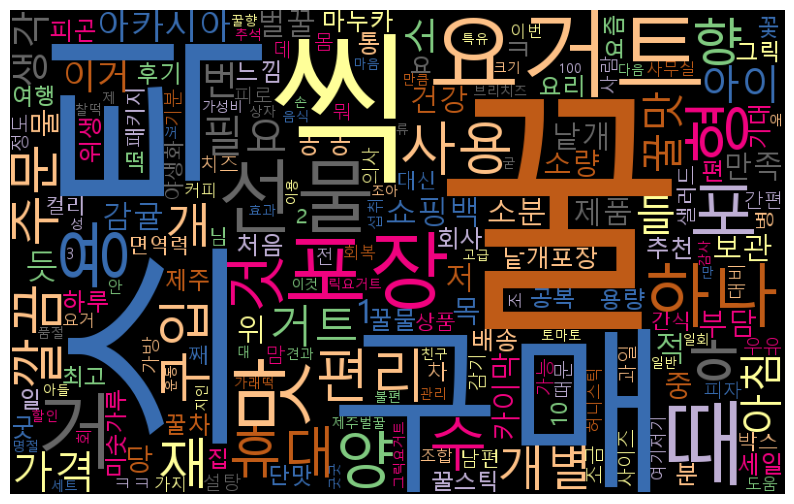

In [135]:
wc_analysis(kurly_data['token_nouns_bareun'])

In [56]:
kurly_data['ProductName'].unique()

array(['[바로생활] 아카시아꿀 스틱 10포', '[제주벌꿀영농조합법인] 제주 벌꿀 (스틱형)',
       '[제주벌꿀영농조합법인] 제주 감귤꽃 벌꿀(스틱형)', '[바로생활] 야생화꿀 스틱 10포',
       '[바로생활] 때죽꿀 스틱 10포', '[올리] 아카시아꿀 스틱 10포', '[올리] 꿀스틱 세트',
       '[올리] 꿀세트 쇼핑백', '[미엘드] 스틱벌꿀 2종 선물세트', '[YOZM] 허니스틱 10포',
       '[콤비타] UMF5+ 마누카꿀 사셰 꿀스틱 30입', '[선물세트] QB 마누카 꿀스틱 UMF 15+ 30포',
       '[선물세트] QB 마누카 꿀스틱 UMF 5+ 30포', '[송강당] 들과 바람 머금은 꽃꿀 스틱',
       '[허니바이허니] 올인원 허니스틱 (90포)', '[콤비타] 뉴질랜드 마누카꿀 5+ 사셰 (12일분)',
       '[콤비타] 뉴질랜드 마누카꿀 5+ 사셰', '[선물세트][콤비타] UMF15+ 마누카꿀 & 사셰 허니스틱 세트',
       '[선물세트][콤비타] UMF18+ 마누카꿀 & 사셰 허니스틱 세트',
       '[콤비타] 프로폴리스 & 마누카꿀 종합 선물세트(UMF5+꿀스틱2/스프레이1/치약2)',
       '[잭스허니] 마누카 선물세트'], dtype=object)

In [140]:
kurly_jeju = kurly_data[kurly_data['ProductCode']==5026039]

In [141]:
frequency_analysis(kurly_jeju['token_nouns_bareun'], 300)

,Token,Frequency
0,스틱,1000
1,꿀,974
2,구매,700
3,때,606
4,요거트,602
...,...,...
295,입맛,7
296,담,7
297,식빵,7
298,궁합,7


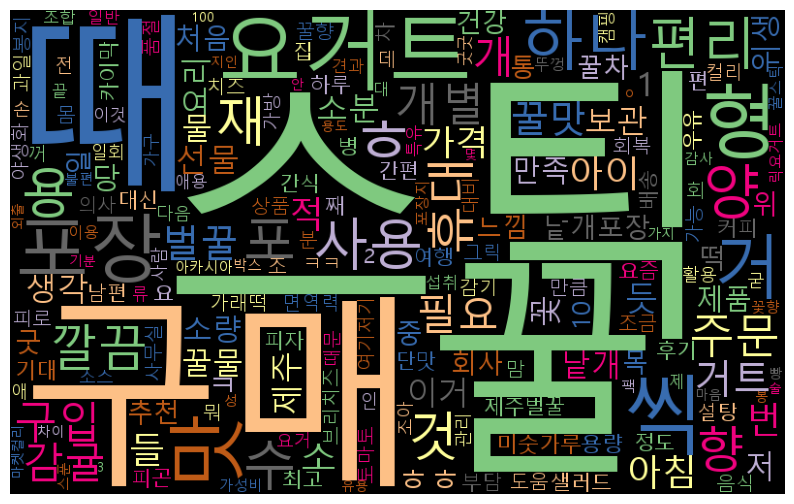

In [142]:
wc_analysis(kurly_jeju['token_nouns_bareun'])

### workerbee

In [40]:
workerbee_data = pd.read_csv(r"C:\Users\NT550-048\Desktop\doeat\doeat2023\KYJ\honey_stick\data\workerbee_data_preprocessed.csv", index_col = 0)

In [41]:
workerbee_data.head(2)

,itemNo,itemName,lastSalePrice,heartCount,reviewCount,itemReviewNo,optionValue,userId,point,contents,isGift,insertTimestamp
0,1308881,[꿀카라멜] 워커비 허니 얼그레이 카라멜 50g,3000,7126,796,6390415,['[구매단위]박스구매(12개입)'],hai***,5,"°고마운 일이 생겨, 지인분께 선물로도 드리고~ 나도 먹고! 재주문 했어요~, 포장...",F,2023-08-11 05:42:48
1,1308881,[꿀카라멜] 워커비 허니 얼그레이 카라멜 50g,3000,7126,796,6376671,['[구매단위]낱개구매'],yangsfami***,5,얼그레이향이 은은하게 나서 정말 맛있어요 당 떨어질 때 하나씩 집어먹기 딱 좋은 것...,F,2023-08-09 16:58:54


In [43]:
workerbee_data['token_nouns_bareun'] = workerbee_data['contents'].apply(lambda x:bareun_tokenizer.tokenize(x).nouns())

In [44]:
workerbee_data['token_verbs_bareun'] = workerbee_data['contents'].apply(lambda x:bareun_tokenizer.tokenize(x).verbs())

빈도

In [45]:
frequency_analysis(workerbee_data['token_nouns_bareun'], 300)

,Token,Frequency
0,선물,4361
1,맛,1530
2,구매,1299
3,용,1112
4,것,1067
...,...,...
295,얼그레,16
296,티,16
297,쿠폰,16
298,쯤,16


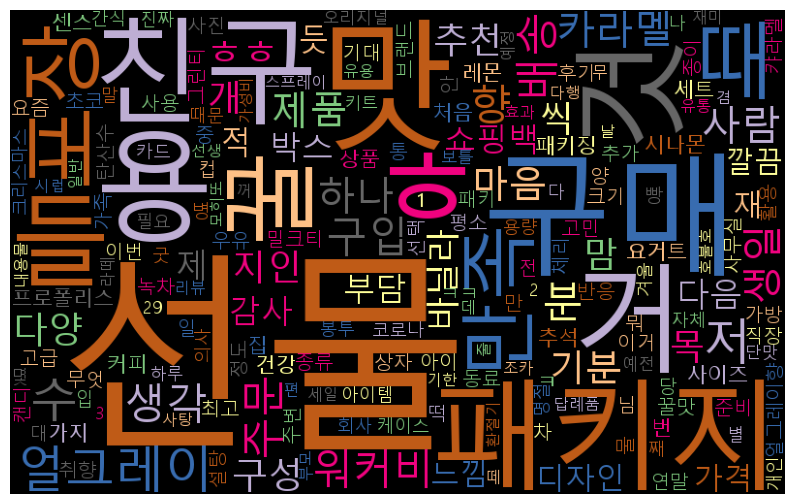

In [69]:
wc_analysis(workerbee_data['token_nouns_bareun'])

In [74]:
workerbee_data['itemName'].unique()

array(['[꿀카라멜] 워커비 허니 얼그레이 카라멜 50g', '[꿀선물] 워커비 기프트세트 미니자(3-4개입)',
       '[꿀선물] 워커비 기프트세트 미니팩', '[건강기능식품] 워커비 프로폴리스 스프레이 20ml',
       '[꿀선물] 워커비 기프트세트 미니자(8개입)', '[꿀선물] 워커비 기프트세트 콤보',
       '[핑크레몬꿀] 워커비 보틀 핑크레모네이드 355g', '[머그컵] 워커비 머그 12oz',
       '[레몬꿀] 워커비 미니팩 레몬 120g(10gx12ea)', '워커비 허니 레몬 30g',
       '[29CM 단독] 워커비 해피팩', '[29CM 단독] 워커비 더블 미니팩(6개입x2)',
       '[꿀선물] 워커비 기프트세트 보틀', '[바닐라꿀] 워커비 보틀 바닐라 355g', '워커비 허니 얼그레이 30g',
       '[얼그레이꿀] 워커비 보틀 얼그레이 355g', '[모히또꿀] 워커비 허니 모히또 355g', '쇼핑백 2종',
       '[레몬꿀] 워커비 보틀 레몬 355g', '[아카시아꿀] 워커비 보틀 오리지널 355g',
       '[유자꿀] 워커비 허니 유자 355g', '[초코꿀] 워커비 미니팩 초코 120g(10gx12ea)',
       '[초코꿀] 워커비 보틀 초코 355g', '[밀랍초] 워커비 해피 허니 캔들', '워커비 허니 시나몬 30g',
       '[계피꿀] 워커비 보틀 시나몬 355g', '[그린티꿀] 워커비 보틀 그린티(말차) 355g',
       '[바닐라꿀] 워커비 미니팩 바닐라 120g(10gx12ea)',
       '[계피꿀] 워커비 미니팩 시나몬 120g(10gx12ea)', '워커비 허니 초코 30g',
       '워커비 허니 바닐라 30g', '워커비 허니 진저 30g', '워커비 허니 모히또 30g',
       '워커비 허니 오리지널 30g', '[생강꿀] 워커비 보틀 진저 355g', '[꿀선물] 허니 홈카페 키트',
 

In [87]:
product_name = '[킷캔] 우리쌀 꿀떡만들기 키트'
keyword = '패키지'
workerbee_data[(workerbee_data['itemName'] == product_name)&(workerbee_data['contents'].apply(lambda x:keyword in x))]['contents']

3964                                                                             아이가 떡만들기를 하고 싶어해서 소량으로 만들수 있는 것 찾다가 패키지도 예쁘고 간편할 것 같아 주문했어요 떡 색감도 예쁘고 맛은 꿀 듬뿍찍으니 맛나요~
3970                                                                                         패키지가 넘 귀여워서 샀어요ᵎ 그냥 집에서 심심할때 만들어 보려고 했는데 유통기한이 길어서 설날에 가족들이랑 만들어야 겠어요 ㅎㅎㅎ
3974                                                                                                         조카랑 지인 선물하려고 샀는데 패키지도 너무 귀여워서 선물하기에 적합해요!! 부담없이 선물하기 좋아요!
3983                                                                                                               선물 용도로 구매했는데 패키지가 고급스럽고 특히 아이들 있는 가정에 선물하기 딱 좋았어요!!
3993                                        선물주고 같이 만들어보기도 했는데요.  깨소가 엄청 맛있었어요. 또 먹고싶을 정도로요. 떡 만들기 해보고 싶지만 2인가구 재료 구입이 난감했었는데 속시끄럽지 않게 딱 이 패키지만으로 만들 수 있어서  또 구입하고 싶어요
3994                                                                 추석선물로 구입했는데 받으신 분들이 아주 좋아하셨어요 우선 패키지가 예뻐서 그냥 딱 보면 기분이 좋습니다 특히 애기들 있는 집은 만족스러워하실것 같아요 설명서도 아주 귀여워

In [ ]:
kw_in_product('[킷캔] 우리쌀 꿀떡만들기 키트', )

In [137]:
workerbee_data.to_csv(r"C:\Users\NT550-048\Desktop\doeat\doeat2023\KYJ\honey_stick\data\workerbee_data_preprocessed.csv")

### 카카오톡 선물하기

In [49]:
kakao_data = pd.read_csv(r"C:\Users\NT550-048\Desktop\doeat\doeat2023\KYJ\honey_stick\data\kakao_data_preprocessed.csv", index_col=0)

In [50]:
kakao_data.head(2)

,id,name,brand,sellingPrice,wishCount,reviewCount,product_tag2,review_text,rating,review_tag1,review_tag2,review_time
0,2270784,국산 프로폴리스 혼합 천연벌꿀 허니스틱(15스틱) 답례품 비마스터 -23.5,비마스터,27800,2228,1152,[],숙취후 아침에 따뜻한 물에 한포 간편히 타먹을수 있어서 좋드라구요. 스틱형이라 휴대...,4,응원,직장동료,2023-04-10 14:16:48
1,2270784,국산 프로폴리스 혼합 천연벌꿀 허니스틱(15스틱) 답례품 비마스터 -23.5,비마스터,27800,2228,1152,[],친구가 건강관리 하라고 선물해 주었습니다 !! 후기가 좋아서 기대했는데 맛있고 건강...,4,생일,친구,2023-04-09 03:27:02


In [86]:
kakao_data[kakao_data['review_tag2'] == '핑크님']

,id,name,brand,sellingPrice,wishCount,reviewCount,product_tag2,review_text,rating,review_tag1,review_tag2,review_time,token_nouns_bareun,token_verbs_bareun
1367,2144896,제주 야생화 벌꿀스틱 꿀타민 선물박스 120g (12g x 10개),꿀,9900,1061,140,[],아주 달달한게 딱 제 취항이네요 맛있게 먹겠습니다! - 강림,4,비타민,핑크님,2022-04-05 20:09:43,"[거, 저, 취항, 강림]","[달달하, 이, 맛있, 먹]"


In [84]:
kakao_data['review_tag2'].unique()

array(['직장동료', '친구', '자녀', '응원과건강기원', '연인', '나', '형제/자매', '선/후배', '선생님',
       '친척', '썸', '부모님', '제자', '딸남자친구', '건강', '조카', '생일선물', '선물용', '학부형',
       '형님', '코로나응원위로', '생일', '아이친구엄마', '언니', '회원님', '지인', '추석선물', '동생',
       '비마스터', '학부모님', '학부', '꿀', '꿀해장', '교회집사님', '고객님', '가족', '학부모님선물',
       '전도사님', '스트리머', '교회언니', '핑크님', '게임단톡방', '감사합니다', '고마운분',
       '엠에이치글로비즈', '직장', '선물', '그냥선물', '거래처선물', '퓨어석류아카', '동기', '아들친구어머니',
       '친구딸', '보낸이의정성', '홀인원기념', '나에게주는선물', '삼실킬로미터', '화줌마HZM'],
      dtype=object)

In [51]:
kakao_data['token_nouns_bareun'] = kakao_data['review_text'].apply(lambda x:bareun_tokenizer.tokenize(x).nouns())

In [53]:
kakao_data['token_verbs_bareun'] = kakao_data['review_text'].apply(lambda x:bareun_tokenizer.tokenize(x).verbs())

In [ ]:
kakao_data.head(2)

분석

In [54]:
frequency_analysis(kakao_data['token_nouns_bareun'], 300)

,Token,Frequency
0,선물,976
1,맛,471
2,꿀,454
3,건강,336
4,거,306
...,...,...
295,간편,6
296,선택,6
297,종이,6
298,내,6


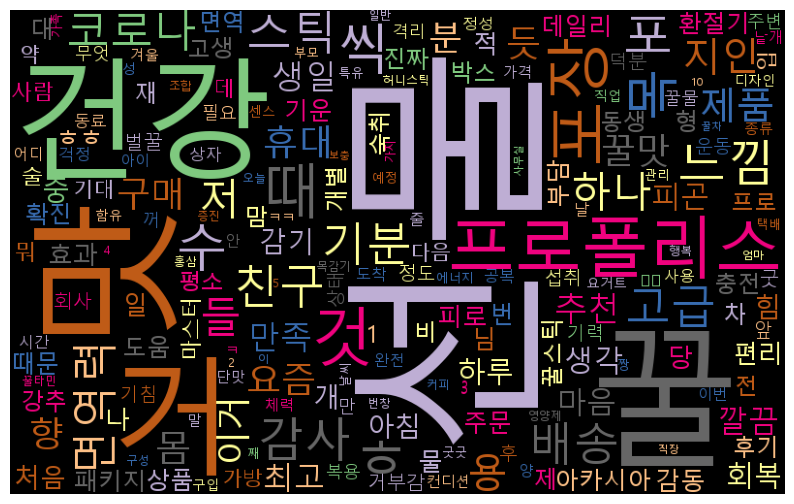

In [70]:
wc_analysis(kakao_data['token_nouns_bareun'])

In [139]:
kakao_data.to_csv(r"C:\Users\NT550-048\Desktop\doeat\doeat2023\KYJ\honey_stick\data\kakao_data.csv")

### 연관분석

In [ ]:
from gensim.models import Word2Vec
from sklearn.decomposition import PCA
import plotly
import plotly.graph_objects as go

In [ ]:
kurly_data

In [ ]:
review_list = data_kurly[data_kurly['ProductName'] == '[온하루] 한돈 건나물 솥밥키트']['token_selected'].to_list()

electra 감성분석

In [42]:
from transformers import ElectraTokenizerFast, ElectraModel, TFElectraModel
tokenizer_electra = ElectraTokenizerFast.from_pretrained("kykim/electra-kor-base")

In [47]:
tokenizer_electra.tokenize(kurly_data['ReviewText'][0])

['작은',
 '박스로',
 '2개',
 '(',
 '10개',
 '##씩',
 '들어있어',
 '20개',
 '##네요',
 ')',
 '주문했습니다',
 '.',
 '의심',
 '##이',
 '많은',
 '타입이라',
 '뭐든',
 '한',
 '번에',
 '주문한',
 '적이',
 '없고',
 ',',
 ',',
 '꼭',
 '먹어보고',
 '써보고',
 '나서야',
 '안심',
 '##하는',
 '타입',
 '##입니다',
 'ㅋ',
 '요즘은',
 '.',
 '.',
 '아카',
 '##시아',
 '##가',
 '많이',
 '없어',
 '.',
 '.',
 '아카',
 '##시아',
 '향',
 '맡아',
 '##보기도',
 '정말',
 '힘든데',
 '.',
 '.',
 '아카',
 '##시아',
 '꿀',
 '##이라니',
 '^',
 '^',
 '너무',
 '반갑',
 '##고',
 '예뻐',
 '주문해',
 '봤습니다',
 '.',
 '일단',
 '너무',
 '작고',
 '예쁘네요',
 '.',
 '더운',
 '여름에',
 '밖에서',
 '운동하는',
 '딸을',
 '위해',
 '건강한',
 '간식으로',
 '챙겨',
 '주려고',
 '합니다',
 '.',
 '예쁜',
 '포장이',
 '##라',
 '예민한',
 '아이',
 '마음에',
 '##도',
 '쏙',
 '드는',
 '듯합니다',
 '.',
 '배송도',
 '빠르고',
 '좋은',
 '제품',
 '좋은',
 '가격에',
 '잘',
 '산',
 '걸',
 '같아',
 '기분',
 '좋네요',
 '.',
 '^',
 '^']